
## Postmates Data Challenge - Jumpan23's New Market Analysis
*Chunzi Wang*

------

**Problem Statement:**

Implement an analysis of the market and dive into the reports on data integrity issues. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Adimn/Desktop/Jumpman23/analyze_me.csv')

In [3]:
data.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

Findings about the dataset:

- Each row looks like a unique delivery that contains necessary info including who, when, where, and what did people order. The only missing fields that I think could be useful in the analysis would be monetary information, like order price, delivery fee, tip for Jumpman, whether they use promotional coupon etc. It would help look into revenue, average price per order, customer LTV; and also implement ROI analysis for the sustainability and profitability of the business. 

- Multiple fields including [’place_category’], [’item_name’], [’item_quantity’], [’item_category_name’], [’how_long_it_took_to_order’], ['when_the_Jumpman_arrived_at_pickup'], ['when_the_Jumpman_left_pickup'] have missing values, which could be counted as one data integrity issue.

### Exploratory Analysis

#### 1. Deliveries

In [5]:
# check if delivery_id is unique
data['delivery_id'].nunique()

5214

5214 is smaller than the 5983 row count, which means there're duplicated delivery ids in the data set and we are going to find them out and look into the issue.

In [6]:
# find out which delivery_id has more than one count (dumplicated)
data['delivery_id'].value_counts()[:10]

1460296    5
1286826    4
1319971    4
1475127    4
1343610    4
1397032    4
1482492    4
1435427    4
1368206    4
1347642    4
Name: delivery_id, dtype: int64

In [7]:
# look at the one specific example delivery_id = 1460296
data[data['delivery_id'] == 1460296]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
2599,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Bistec,1.0,Tacos,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3510,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Tortilla,1.0,Soups,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3796,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Chips & La Esquina's Own Salsa Roja,1.0,Plates,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4056,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Canned Soda,1.0,Cold Drinks,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4487,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Elotes Callejeros,1.0,Sides,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842


Findings:

- There are multiple rows for an order with multiple items. Apart from item name and item_category_name, all other fields including timestamps and geocode are exactly the same, which indicates they are from the same order so it should be combined into one single row for a unique delivery. This could be counted as another data integrity issue. 

#### 2. Customers

In [8]:
# look at how many customers used our platform in the total time frame
data['customer_id'].nunique()

3192

In [9]:
# look at descriptive statistics of the number of deliveries each customer ordered
data['customer_id'].value_counts().describe()

count    3192.000000
mean        1.874373
std         1.715290
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: customer_id, dtype: float64

Findings:

- More than half of customers have only ordered once. 
- There are also power users who have ordered multiple times with maximum being 28. 

So I decided to cluster our customer base into categories based on order frequencies to better observe the pattern.

In [10]:
# make a new dataframe for the convenience of anlaysis
df2 = data['customer_id'].value_counts().reset_index()
df2.columns = ['customer_id','count']

# set threshold for clusters
conditions = [(df2['count'] >= 20),
              (df2['count'] < 20) & (df2['count'] >= 10),
              (df2['count'] < 10) & (df2['count'] >= 3),
              (df2['count'] < 3)]
choices = ['>=20','10-20','3-10','1-3']
df2['category'] = np.select(conditions, choices, default='null')

# look at how many customers are in each category
df2.groupby('category').agg({'customer_id':'count'}).sort_values('customer_id')

,customer_id
category,
>=20,2
10-20,25
3-10,599
1-3,2566


Findings:

We could observe a 80/20 rule from the distribution of customer order frequency: 
- Less than 1% of customers are **power users** who often place order using our platform.
- Around 18% of customers are **occasional users** who user our platform less regularly, but still remain active at some point. 
- 80% of Customers are mostly **one-time users**. It’s hard to tell if they have churned or not based on limited time frame but it’s essential for the health of business that we encourage more product usage from this cluster and get retention. 


#### 3. Jumpman

In [11]:
# look at how many unique jumpmans we have 
data['jumpman_id'].nunique()

578

In [12]:
# look at descriptive statistics of the number of deliveries each jumpman sent
data['jumpman_id'].value_counts().describe()

count    578.000000
mean      10.351211
std       11.952803
min        1.000000
25%        2.000000
50%        6.000000
75%       13.000000
max       78.000000
Name: jumpman_id, dtype: float64

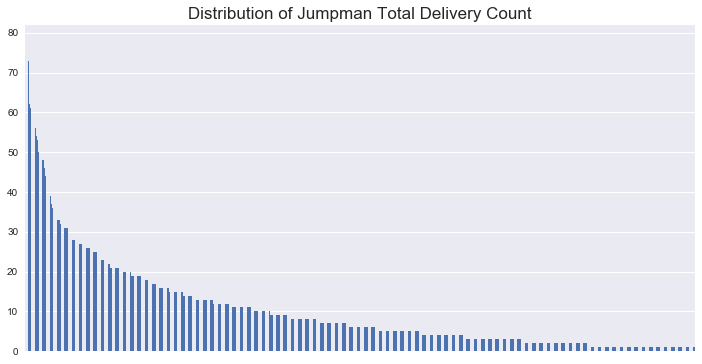

In [13]:
# visualize the distribution
fig, ax = plt.subplots(figsize=(12,6))
data['jumpman_id'].value_counts().plot(kind='bar')
plt.xticks([])
plt.title('Distribution of Jumpman Total Delivery Count',fontdict={'fontsize':17})
plt.show()

Findings:

- The total delivery count of each Jumpman during this month observes **exponential distribution**. 
- About 25% of Jumpman are highly engaged and actively picking up orders.


#### 4. Pickup Places and Their Categories

In [14]:
# look at how many pickup places we have done business with in the dataset
print(data['pickup_place'].nunique())
# look at how many distinct categories we have for these places
print(data['place_category'].nunique())

898
57


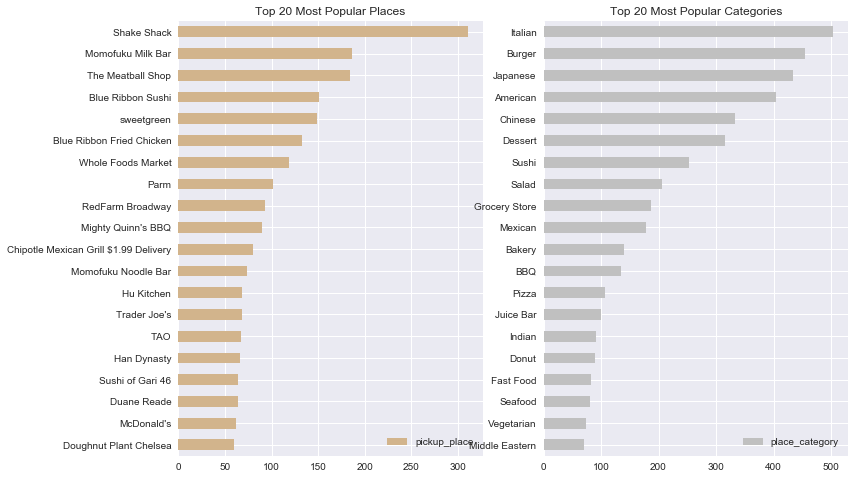

In [15]:
# visualize the total count by descending frequency
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(12,8))
pd.DataFrame(data['pickup_place'].value_counts()[:20]).sort_values('pickup_place',ascending=True).plot.barh(color='tan',title='Top 20 Most Popular Places',ax=ax[0])
pd.DataFrame(data['place_category'].value_counts()[:20]).sort_values('place_category',ascending=True).plot.barh(color='silver',title='Top 20 Most Popular Categories',ax=ax[1])
plt.show()

Findings: 

- Italian, Burger, Japanese, American and Chinese are the most popular restaurant types in NYC that received the most delivery orders. 
- Shakeshack has most deliveries among all restuarants, with an advantage of more than 100 orders compared with second place.

#### 5.Ordered Items and Their Categories

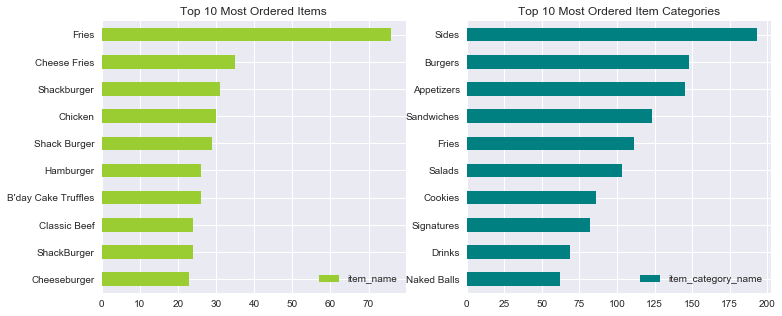

In [16]:
# visualize the total count by descending frequency
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(12,5))
pd.DataFrame(data['item_name'].value_counts()[:10]).sort_values('item_name',ascending=True).plot.barh(color='yellowgreen',title='Top 10 Most Ordered Items',ax=ax[0])
pd.DataFrame(data['item_category_name'].value_counts()[:10]).sort_values('item_category_name',ascending=True).plot.barh(color='teal',title='Top 10 Most Ordered Item Categories',ax=ax[1])
plt.show()

Findings:

- Fries, Burgers, Chicken, Sandwiches are the most ordered items. It's consistent with the popularity of American Burger Chain and Burger restaurants. It speaks to customer preference in food delivery, that they want it fast, simple, and convenient. 
- I found there’re item names that have different formats and creates inconsistency. e.g. ’Shackburger’, ’Shack Burger’, ’ShackBurger’ are the same thing but it has 3 different naming conventions. It resulted in not-so-accurate analysis since if combined together, 'Shack Burger'would be the most ordered items replacing 'Fries'. It could be counted as another data integreity issue and should be solved. 


#### 6. Dates, Time, and Weekly Trends

I caluclated two time metrics based on the timestamp we have to measure operation efficiency:

- **order time**: It's derived from ['how_long_it_took_to_order'], and it's in minutes.
- **delivery time**: It's calculated by subtracting the time when the delivery started from the time when the Jumpman arrived at dropoff. It's in minutes.

I also created three new features based on our current timestamp to better observe trends in data manipulation:

- **delivery date**: It's derived from ['when_the_delivery_started'].
- **delivery day of week**: It's derived from ['delivery_date'] after its creation.
- **hour**: It's derived from ['when_the_delivery_started'] to indicate the time when customers ordered a delivery.

In [17]:
# convert string into datetime object for data manipulcation
data['how_long_it_took_to_order'] = pd.to_datetime(data['how_long_it_took_to_order'])
data['when_the_delivery_started'] = pd.to_datetime(data['when_the_delivery_started'])
data['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(data['when_the_Jumpman_arrived_at_pickup'])
data['when_the_Jumpman_left_pickup'] = pd.to_datetime(data['when_the_Jumpman_left_pickup'])
data['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(data['when_the_Jumpman_arrived_at_dropoff'])

# calculate time interval into minutes
data['order_time'] = (data['how_long_it_took_to_order'].dt.hour*3600+data['how_long_it_took_to_order'].dt.minute*60+data['how_long_it_took_to_order'].dt.second)/60
data['delivery_time'] = data['when_the_Jumpman_arrived_at_dropoff'].subtract(data['when_the_delivery_started']).apply(lambda row:row.total_seconds())/60

# get date from timestamp
data['delivery_date'] = data['when_the_delivery_started'].apply(lambda row:row.date())

# get day of week from date
data['delivery_dayofweek'] = data['delivery_date'].apply(lambda row:row.weekday())

# add hour feature from original timestamp
data['hour'] = data['when_the_delivery_started'].apply(lambda row:row.hour)

In [18]:
# look at the time range of the dataset
print(data['when_the_delivery_started'].min())
print(data['when_the_delivery_started'].max())

2014-10-01 00:07:58.632482
2014-10-30 23:08:43.481900


It shows that all tracsactions happen in October, 2014, which is the first month of Jumpman23 being launched in NYC.

##### 6.1 Look at Daily Activites for deliveries, customers, and jumpman

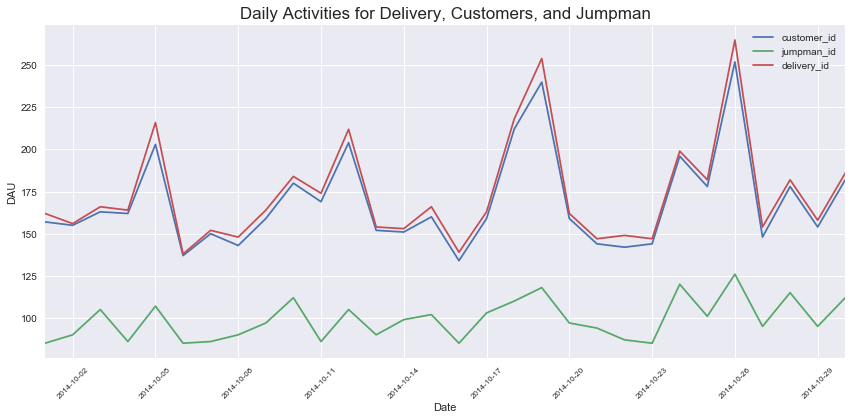

In [19]:
# visualize the daily activites
fig, ax = plt.subplots(figsize=(12,6))
data.groupby('delivery_date').agg({'delivery_id':'nunique','customer_id':'nunique','jumpman_id':'nunique'}).plot(kind='line',ax=ax)
plt.title('Daily Activities for Delivery, Customers, and Jumpman',fontdict={'fontsize':17})
ax.set_xlabel('Date')
ax.set_ylabel('DAU')
ax.grid(True)
plt.xticks(rotation=45,size=8)
plt.tight_layout()
plt.show()

In [20]:
# look at average DAU for this month
data.groupby('delivery_date').agg({'delivery_id':'nunique','customer_id':'nunique','jumpman_id':'nunique'}).reset_index()['customer_id'].mean()

168.9

Findings:
    
- Average DAU for Customer is 169.
- The total daily count of deliveries and customers is consistent, meaning most of customers placed one order per day. 
- Number of jumpman is lower but still conforms to the trend. 
- We could observe a weekly seasonality pattern here and I'll dive deeper into the weekly trend in the following. 

##### 6.2 Look into Weekly Pattern for Number of Deliveries

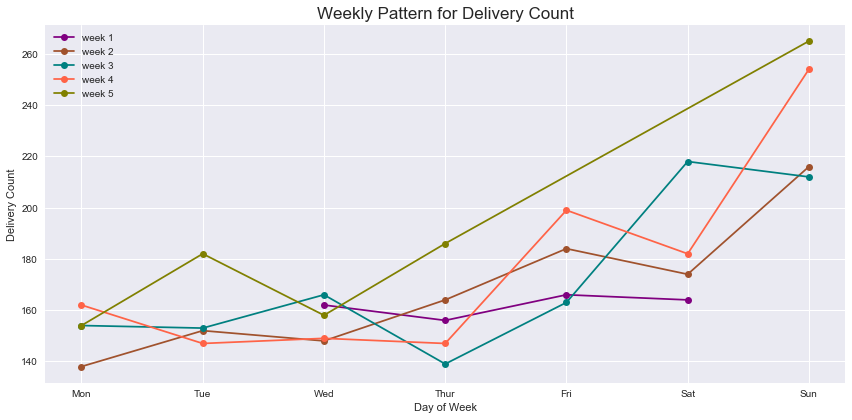

In [21]:
# put dates into week batch
data['week_batch'] = data['delivery_date'].apply(lambda row:(row.day-5)//7+2)
# aggreagte by week to see activites in each day of week at weekly level
df1 = data.groupby(['week_batch','delivery_dayofweek']).agg({'delivery_id':'nunique'}).reset_index()

# visualize the weekly pattern
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df1[df1['week_batch']==1]['delivery_dayofweek'],
        df1[df1['week_batch']==1]['delivery_id'],marker = 'o',label='week 1',color='purple')
ax.plot(df1[df1['week_batch']==2]['delivery_dayofweek'],
        df1[df1['week_batch']==2]['delivery_id'],marker = 'o',label='week 2',color='sienna')
ax.plot(df1[df1['week_batch']==3]['delivery_dayofweek'],
        df1[df1['week_batch']==3]['delivery_id'],marker = 'o',label='week 3',color='teal')
ax.plot(df1[df1['week_batch']==4]['delivery_dayofweek'],
        df1[df1['week_batch']==4]['delivery_id'],marker = 'o',label='week 4',color='tomato')
ax.plot(df1[df1['week_batch']==5]['delivery_dayofweek'],
        df1[df1['week_batch']==5]['delivery_id'],marker = 'o',label='week 5',color='olive')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Delivery Count')
ax.grid(True)
plt.xticks(np.arange(7), ('Mon','Tue','Wed','Thur','Fri','Sat','Sun'))
plt.title('Weekly Pattern for Delivery Count',fontdict={'fontsize':17})
plt.legend()
plt.tight_layout()
plt.show()

Findings:
- Friday, Saturday and Sunday have more deliveries than weekdays. We could implement promotional events during weekdays at lunch hour for working professionals to boost order units.
- Weeks in the later half of the month usually have more orders on the same weekday than previous weeks, showing signs of growth.

##### 6.3 Look into Time to Order and Delivery Time

In [22]:
# look at descriptive statistics
data[['order_time','delivery_time']].describe()

,order_time,delivery_time
count,3038.000000,5983.000000
mean,7.811043,46.081178
std,5.660756,20.226641
min,1.366667,3.047181
25%,4.437500,32.667249
50%,6.283333,42.674769
75%,9.191667,55.126968
max,73.216667,340.308810


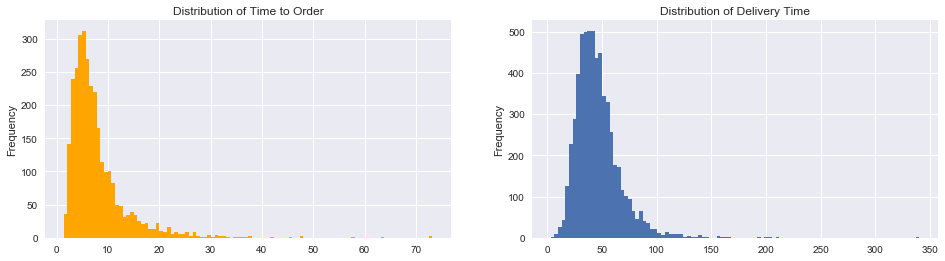

In [23]:
# visualize the distribution for clearer understanding
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,4))

# distribution of order time
data['order_time'].plot(kind='hist',bins=100,color='orange',title='Distribution of Time to Order',ax=ax[0])
# distribution of delivery time
data['delivery_time'].plot(kind='hist',bins=100,title='Distribution of Delivery Time',ax=ax[1])

plt.show()

Findings:
- Both time to order and delivery time approximates a **normal distribution**, with right-skewed long tail for outliers. 
- On average, customer completed their order session within 6-7 minutes, and a delivery arrived within 42-46 minutes after when the delivery started. These time interval could be used as important metrics to optimize on for operation efficiency. 

##### 6.4 Look into Vehicle Type and Their Respective Delivery Time

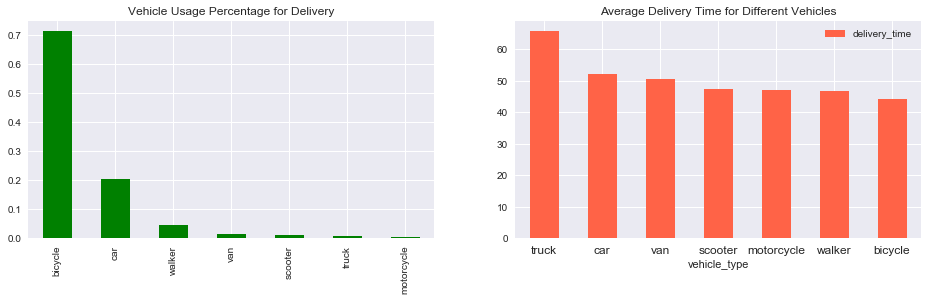

In [24]:
# visualize the distribution for clearer understanding
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,4))

# distribution vehicle types
data['vehicle_type'].value_counts(normalize=True).plot(kind='bar',color='green',title='Vehicle Usage Percentage for Delivery',ax=ax[0])
plt.xticks(rotation=0,size=12)
# delivery time for different vehicles
data.groupby('vehicle_type').agg({'delivery_time':'mean'}).sort_values('delivery_time',ascending=False).plot(kind='bar',color='tomato',title='Average Delivery Time for Different Vehicles',ax=ax[1])
plt.xticks(rotation=0,size=12)

plt.show()

Findings:
- 70% of deliveries were sent by bicycle.20% by car and other types of transportation including walking, scooter, truck and motorcycle. ------- Considering NYC’s traffic condition, it makes sense that bicycle takes least time to deliver on average and we should suggest our jumpman using bicycle as their main method of delivery vehicle. 

##### 6.5 Look into Number of Deliveries by the Hour and Their Respective Delivery Time

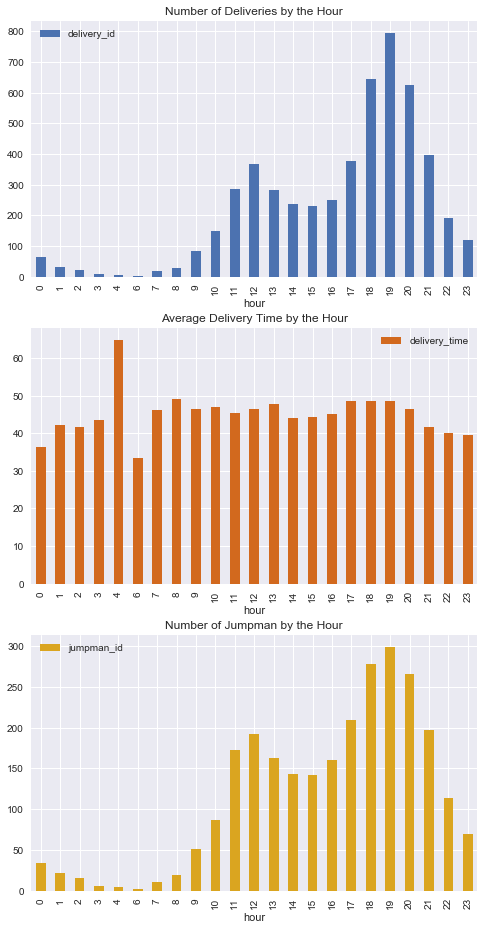

In [26]:
# visualize the distribution for clearer understanding
fig, ax = plt.subplots(nrows = 3, ncols = 1,figsize=(8,16))

# number of deliveries by the hour
data.groupby('hour').agg({'delivery_id':'nunique'}).plot(kind='bar',title='Number of Deliveries by the Hour',ax=ax[0])
# average delivery time by the hour
data.groupby('hour').agg({'delivery_time':'mean'}).plot(kind='bar',color='chocolate',title='Average Delivery Time by the Hour',ax=ax[1])
# number of jumpman by the hour
data.groupby('hour').agg({'jumpman_id':'nunique'}).plot(kind='bar',color='goldenrod',title='Number of Jumpman by the Hour',ax=ax[2])

plt.show()

Findings:
- Every day, there’re two peaks when large number of deliveries happened: one around noon (11am-1pm) and a larger one around dinner time (5-9pm).
- The number of deliveries keep decreasing from the evening peak until early morning at 6am, before it starts to rise again. It’s consistent with daily routine. 
- In terms of delivery time, although we have considerable number of deliveries happen during lunch and dinner peak hours, it doesn’t really lead to increase in delivery time due to heavy traffic/restaurant operations. It could be explained by number of jumpman by the hour, which looks exactly the same as hourly delivery trend that relieves the stress of high volume of deliveries. 